<div class="alert alert-block alert-danger">
    <b> Unraveling the cytoskeletal architecture of cancer cells: a novel computational approach to predict cell fate - CODE</b> 
    
 **4 - CELL SEGMENTATION**
    
**Author**: Diogo Fróis Vieira
</div>

<div class="alert alert-block alert-info">
    
 **IMPORTS**
    
</div>

In [1]:
import sys
sys.path.append(os.path.abspath('..'))
from packageCYSK.importing import *
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import pickle
import cv2
from packageCYSK.manual_segmentation import *

print('📚 All libraries successfully imported **(for ROI selection)** 📚')

📚 All libraries successfully imported **(for ROI selection)** 📚


<div class="alert alert-block alert-info">
    
 **DIRECTORIES**
    
</div>

In [2]:
# Define dataset folder.
folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 1-a-tubulin_Sofia"

# Import images from CYTO, NUCL and RGB folders.
options     = ["CYTO","NUCL","RGB"]

# Function to automatically retrieve image labels and indexes.
denominator = label_tubulin

# Dictionary with keys "CYTO", "NUCL", "RGB".
data = init_import(folder,options,denominator)

TiffPage 0: IndexError: tuple index out of range


>>> [RGB] added.
>>> [CYTO] added.
>>> [NUCL] added.


<div class="alert alert-block alert-info">
    
 **SELECT IMAGE**
    
</div>

In [3]:
def dropdown_image_eventhandler(change):
    global idx
    idx = dropdown_image.value
    lab = data['CYTO']['Label'][dropdown_image.value]
    print('Image ' + str(idx) + ' (' + str(lab) +') selected.')

dropdown_image = widgets.Dropdown(description =  'Select Image:' , options = ['...'] + list(data['CYTO'].index))
dropdown_image.observe(dropdown_image_eventhandler, names='value')
display(dropdown_image)

Dropdown(description='Select Image:', options=('...', 11, 16, 18, 20, 30, 34, 36, 38, 40, 42, 44, 59, 63, 66, …

Image 9 (WT) selected.


<div class="alert alert-block alert-info">
    
 **ROI SELECTION**
    
</div>

In [4]:
%matplotlib qt
ROIs2 = roi_selector(data,idx,'None')

🔎
Window closed
list index out of range


In [5]:
ROIs2

,Name,Index,Label,Image Size,ROImask
0,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"(1040, 1388)","([277, 277, 277, 278, 278, 278, 278, 278, 278,..."
1,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"(1040, 1388)","([678, 678, 678, 678, 678, 678, 678, 678, 678,..."


**DELETE LAST ROW**

In [25]:
ROIs2.drop(ROIs2.tail(1).index,inplace=True)

---

<div class="alert alert-block alert-info">
    
 **PLOT ROIs**
    
</div>

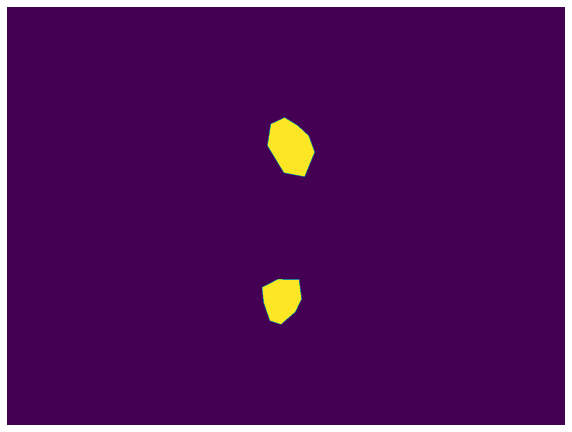

In [6]:
%matplotlib inline
plot_selected_ROIs(ROIs2,idx)

<div class="alert alert-block alert-info">
    
 **SAVE ROIs**
    
</div>

In [7]:
ROIs2.to_pickle(folder + '//ROIs//ROIs_TEST.pkl')   

---